In [36]:
# importing required packages

import re, collections
from collections import defaultdict
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

np.random.seed(42)
%matplotlib inline

## Read Data

In [37]:
myDir = Path.cwd().parents[0]
dataFolder = myDir / 'data/asap-sas'
print(dataFolder)


C:\Users\Devanshi\Desktop\finalProject\data\asap-sas


In [38]:
# getting data into dataframe

df = pd.read_csv(dataFolder/'train.tsv', sep='\t', header=0)
# df['EssaySet'] = df['EssaySet'].astype(str)
df.head()


,Id,EssaySet,Score1,Score2,EssayText
0,1,1,1,1,Some additional information that we would need...
1,2,1,1,1,"After reading the expirement, I realized that ..."
2,3,1,1,1,"What you need is more trials, a control set up..."
3,4,1,0,0,The student should list what rock is better an...
4,5,1,2,2,For the students to be able to make a replicat...


In [39]:
df.shape

(17207, 5)

In [40]:
df.dtypes

Id            int64
EssaySet      int64
Score1        int64
Score2        int64
EssayText    object
dtype: object

In [41]:
group_count = df.groupby(df.EssaySet).size().reset_index(name='essay_count')
group_count['EssaySet'] = group_count['EssaySet'].astype(str)
group_count

,EssaySet,essay_count
0,1,1672
1,2,1278
2,3,1891
3,4,1738
4,5,1795
5,6,1797
6,7,1799
7,8,1799
8,9,1798
9,10,1640


Text(0.5,1,'Essays per Set')

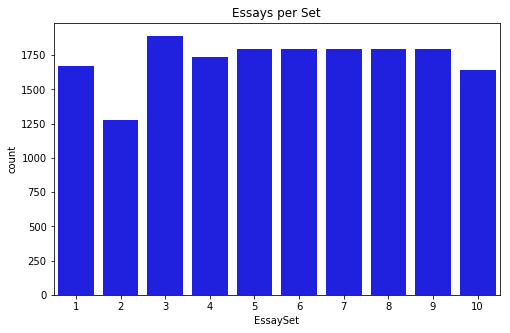

In [42]:
plt.figure(figsize=(8,5))
g = sns.countplot(x="EssaySet", color='b' ,data=df)
g.set_title("Essays per Set")

Text(0.5,1,'Score Distribution per Essay Set')

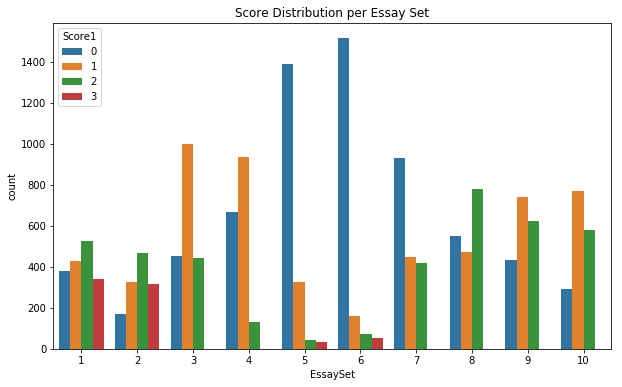

In [43]:
plt.figure(figsize=(10,6))
g = sns.countplot(x="EssaySet", hue="Score1",  data=df)
g.set_title("Score Distribution per Essay Set")

## Histogram of essay length across each Essay Set

In [44]:
df['EssayLength'] = df['EssayText'].apply(len)
df.head()

,Id,EssaySet,Score1,Score2,EssayText,EssayLength
0,1,1,1,1,Some additional information that we would need...,314
1,2,1,1,1,"After reading the expirement, I realized that ...",296
2,3,1,1,1,"What you need is more trials, a control set up...",169
3,4,1,0,0,The student should list what rock is better an...,88
4,5,1,2,2,For the students to be able to make a replicat...,158


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

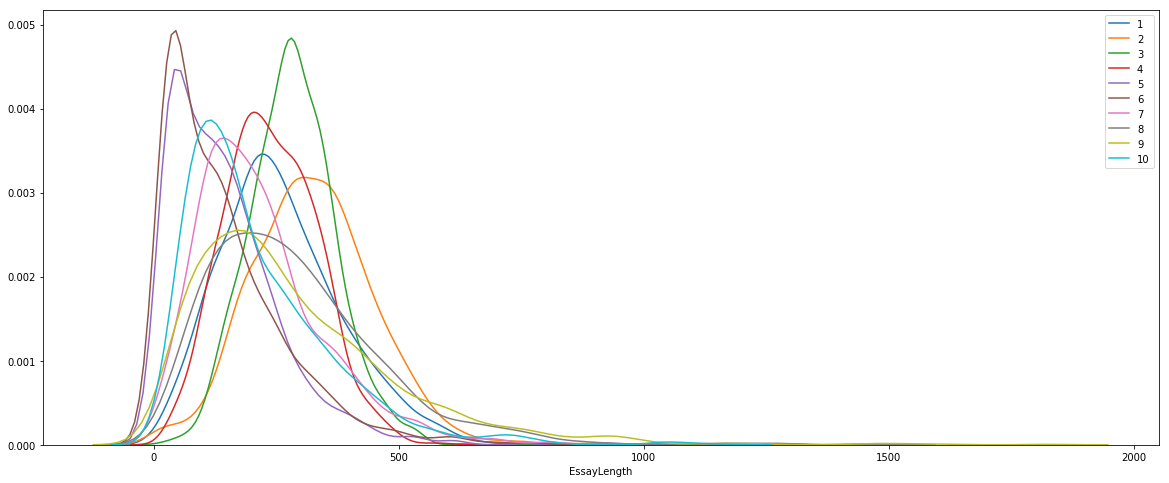

In [57]:
plt.figure(figsize=(20,8))
for i in df.EssaySet.unique():
    
    mydf = df.loc[df.EssaySet == i]
    sns.distplot(mydf['EssayLength'],hist=False, label=i)
    
plt.show()
# g.savefig("FinalGraphs/kdeplot.png", dpi=300, bbox_inches='tight')

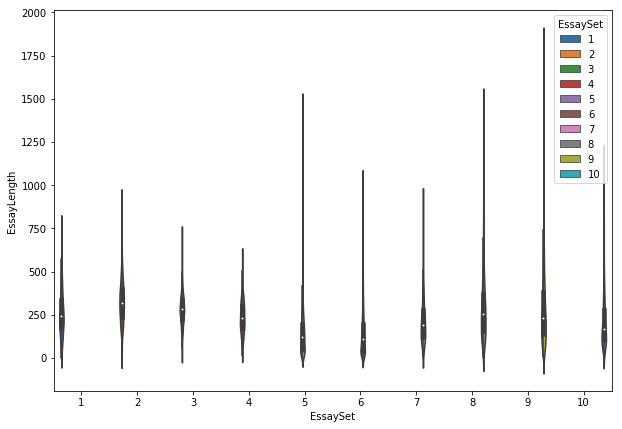

In [75]:
plt.figure(figsize=(10,7))
sns.violinplot(x="EssaySet", y="EssayLength", hue="EssaySet", data=df)
# sns.despine(left=True)